In [ ]:
!pip install scikit-learn==1.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 97.7 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.0 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight



In [ ]:
df = pd.read_csv('/kaggle/input/spotify-1million-tracks/spotify_data.csv')

In [ ]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [ ]:
df.isnull().sum()

Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [ ]:
df= df.dropna(axis = 0)

In [ ]:
df.isnull().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

## Exploratory Data Analysis


In [ ]:
print(df.describe())
print(df.info())

         Unnamed: 0    popularity          year  danceability        energy  \
count  1.159748e+06  1.159748e+06  1.159748e+06  1.159748e+06  1.159748e+06   
mean   6.590654e+05  1.838309e+01  2.011955e+03  5.374425e-01  6.396737e-01   
std    4.285502e+05  1.588563e+01  6.803908e+00  1.844753e-01  2.704993e-01   
min    0.000000e+00  0.000000e+00  2.000000e+03  0.000000e+00  0.000000e+00   
25%    2.899398e+05  5.000000e+00  2.006000e+03  4.130000e-01  4.540000e-01   
50%    5.798885e+05  1.500000e+01  2.012000e+03  5.500000e-01  6.940000e-01   
75%    1.031692e+06  2.900000e+01  2.018000e+03  6.770000e-01  8.730000e-01   
max    1.473395e+06  1.000000e+02  2.023000e+03  9.930000e-01  1.000000e+00   

                key      loudness          mode   speechiness  acousticness  \
count  1.159748e+06  1.159748e+06  1.159748e+06  1.159748e+06  1.159748e+06   
mean   5.287763e+00 -8.981292e+00  6.346560e-01  9.281520e-02  3.215380e-01   
std    3.555204e+00  5.682203e+00  4.815267e-01  1.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


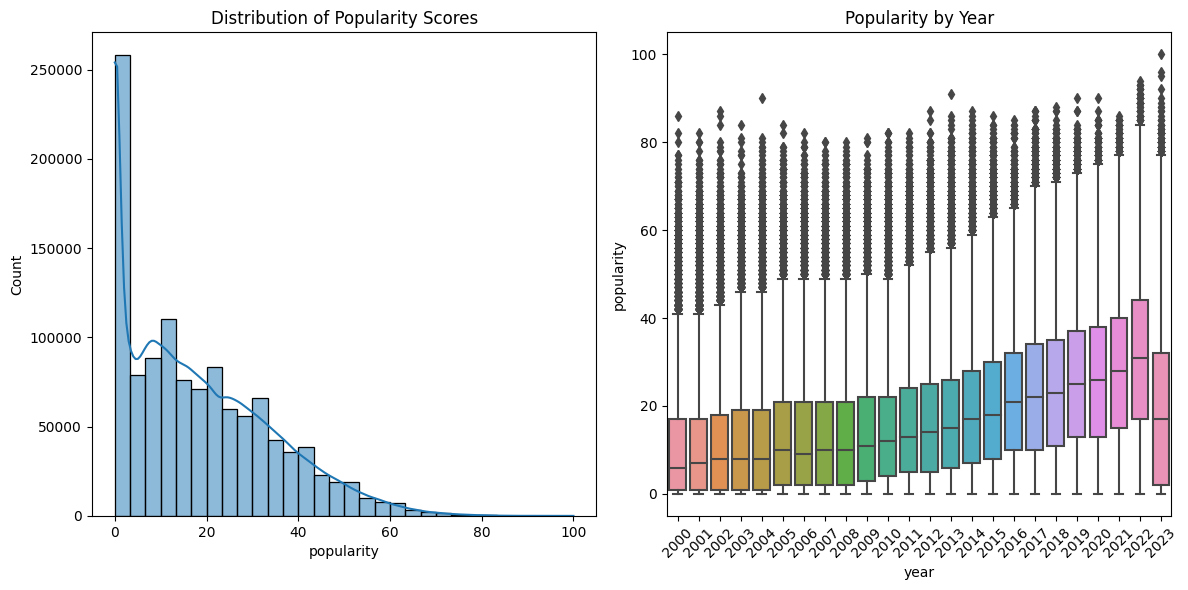

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity Scores')
plt.subplot(1, 2, 2)
sns.boxplot(x='year', y='popularity', data=df)
plt.title('Popularity by Year')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

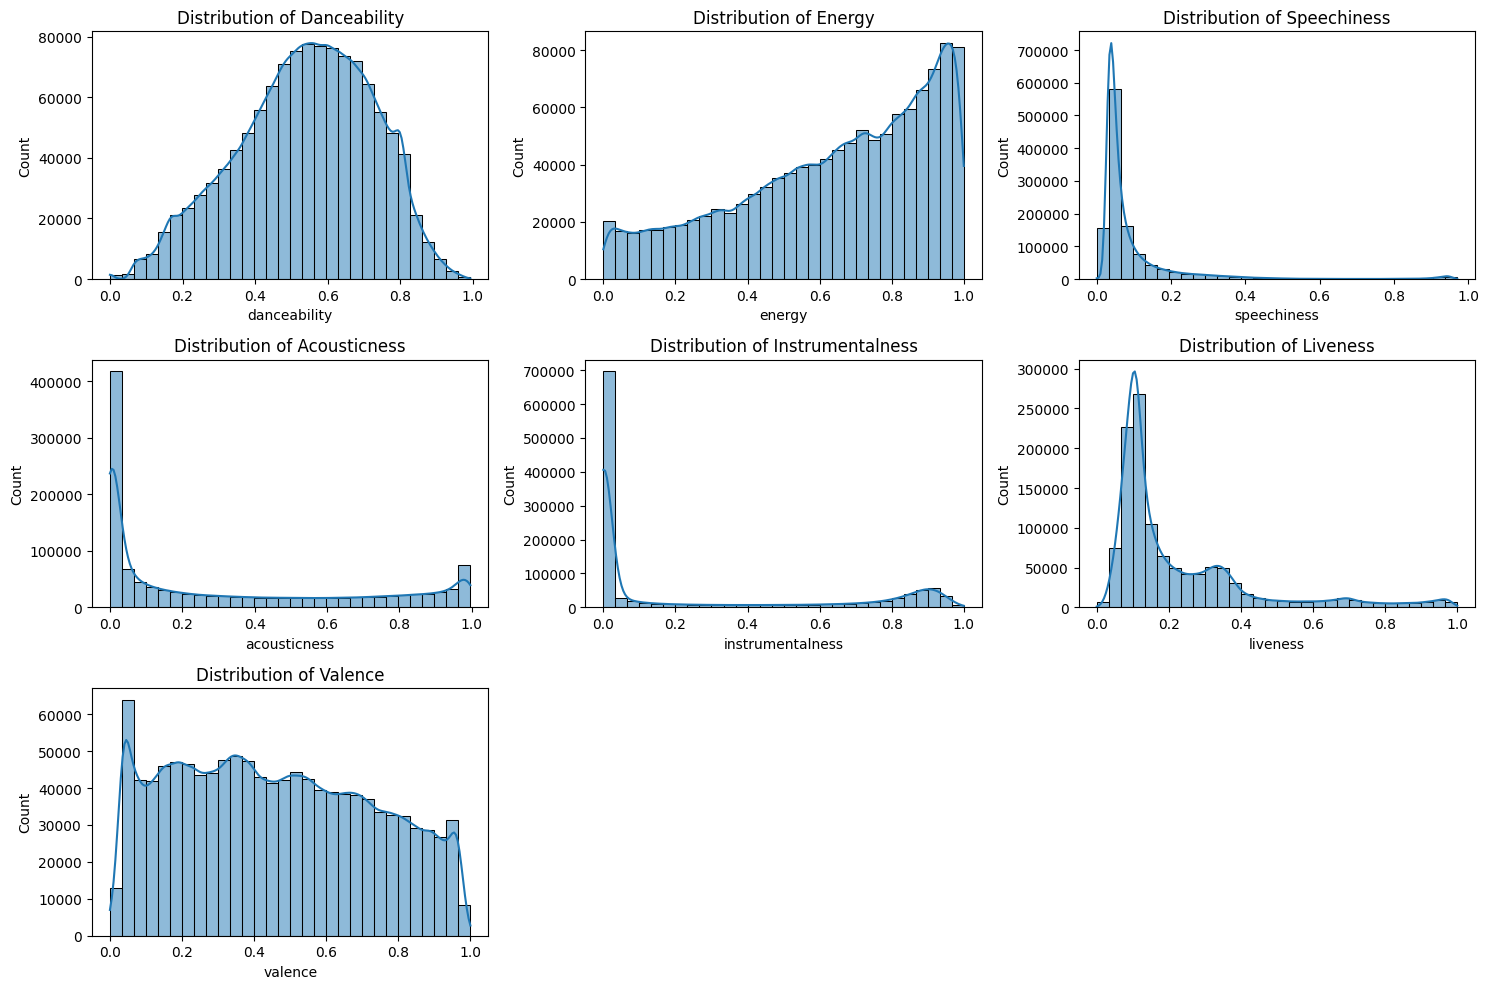

In [ ]:
audio_features = ['danceability', 'energy', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


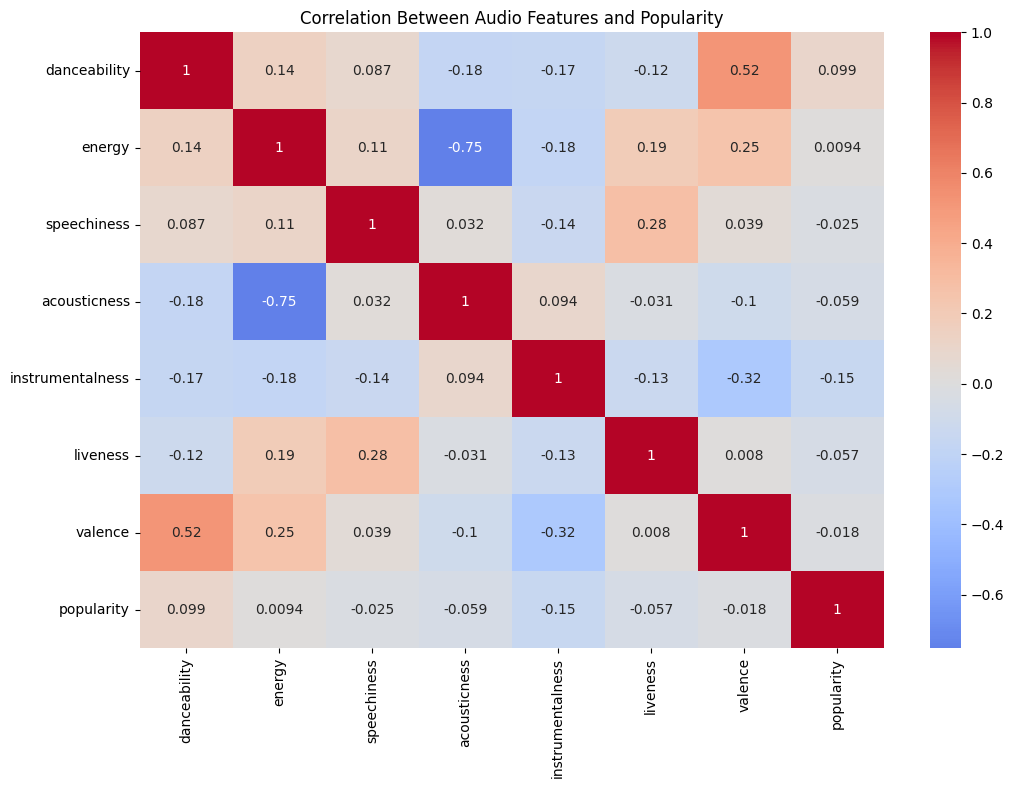

In [ ]:
corr = df[audio_features + ['popularity']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Audio Features and Popularity')
plt.show()

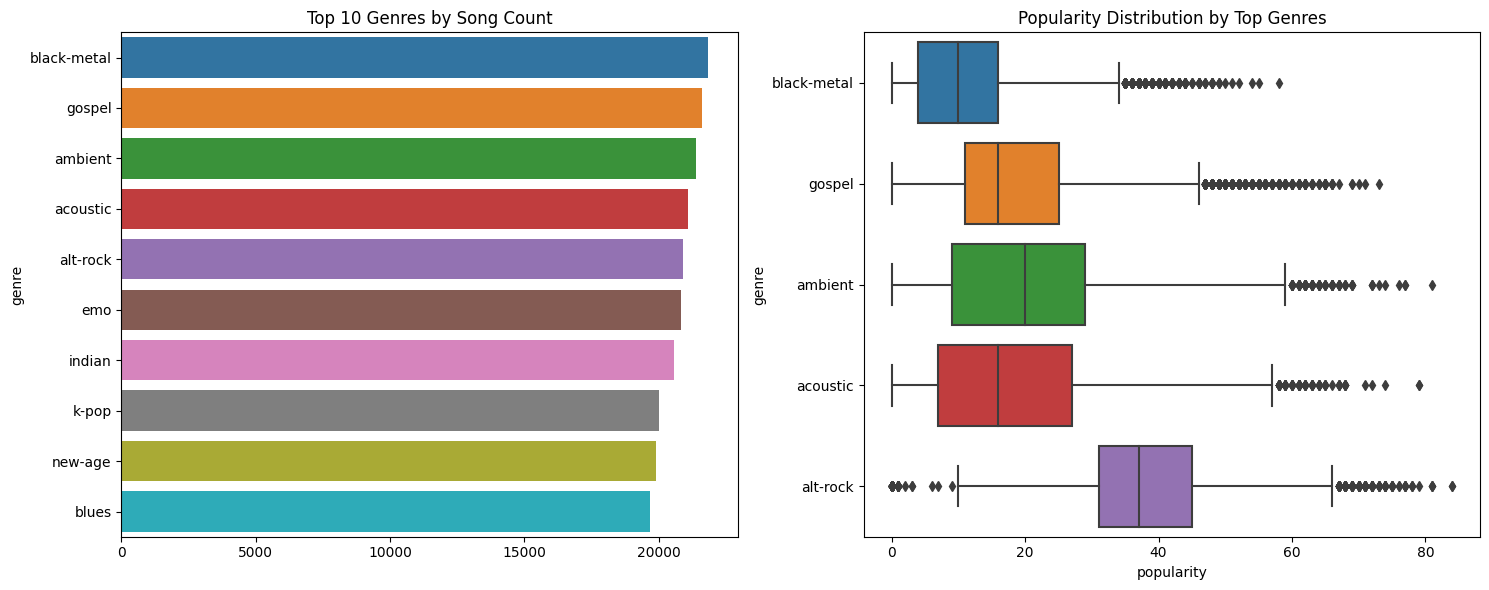

In [ ]:
plt.figure(figsize=(15, 6))

# Count of songs by genre
plt.subplot(1, 2, 1)
genre_counts = df['genre'].value_counts().head(10)  # Top 10 genres
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Genres by Song Count')

# Popularity by genre
plt.subplot(1, 2, 2)
top_genres = df['genre'].value_counts().head(5).index
sns.boxplot(y='genre', x='popularity',
            data=df[df['genre'].isin(top_genres)],
            order=top_genres)
plt.title('Popularity Distribution by Top Genres')

plt.tight_layout()
plt.show()

/tmp/ipykernel_35/62744606.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y=feature, data=df, label=feature, ci=None)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_35/62744606.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y=feature, data=df, label=feature, ci=None)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use

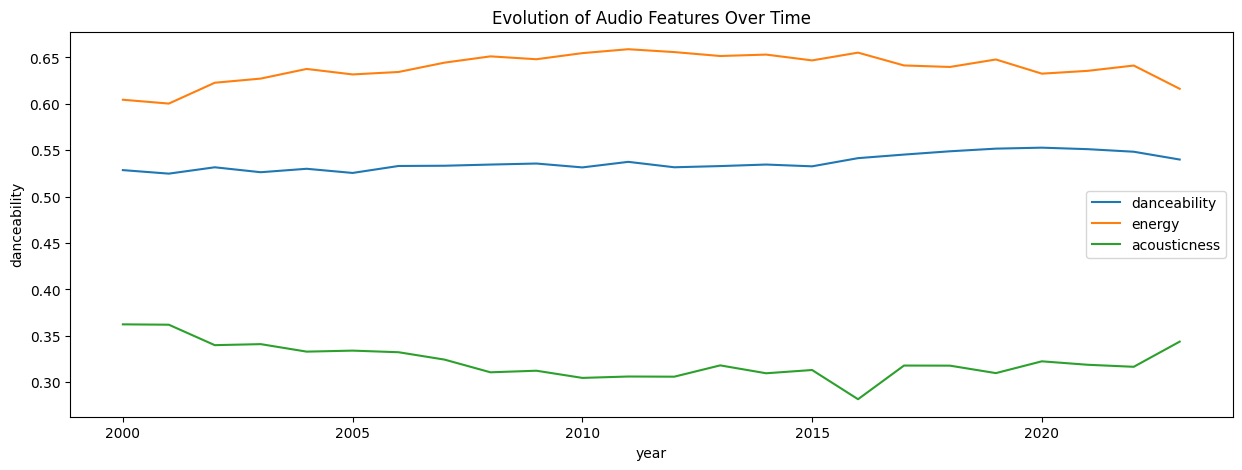

In [ ]:
plt.figure(figsize=(15, 5))

# Feature trends over years
features_to_plot = ['danceability', 'energy', 'acousticness']
for feature in features_to_plot:
    sns.lineplot(x='year', y=feature, data=df, label=feature, ci=None)

plt.title('Evolution of Audio Features Over Time')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

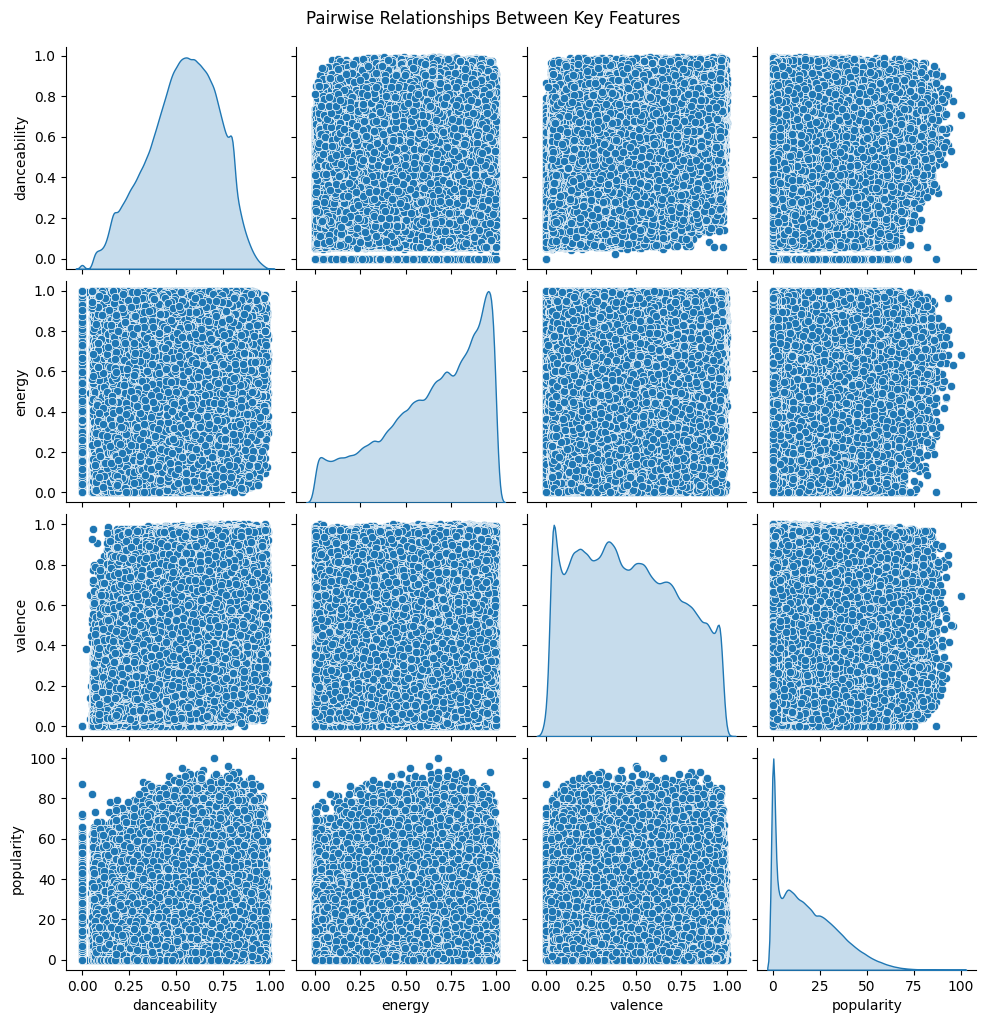

In [ ]:
# Scatter plot matrix for key features
sns.pairplot(df[['danceability', 'energy', 'valence', 'popularity']],
             diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Key Features', y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


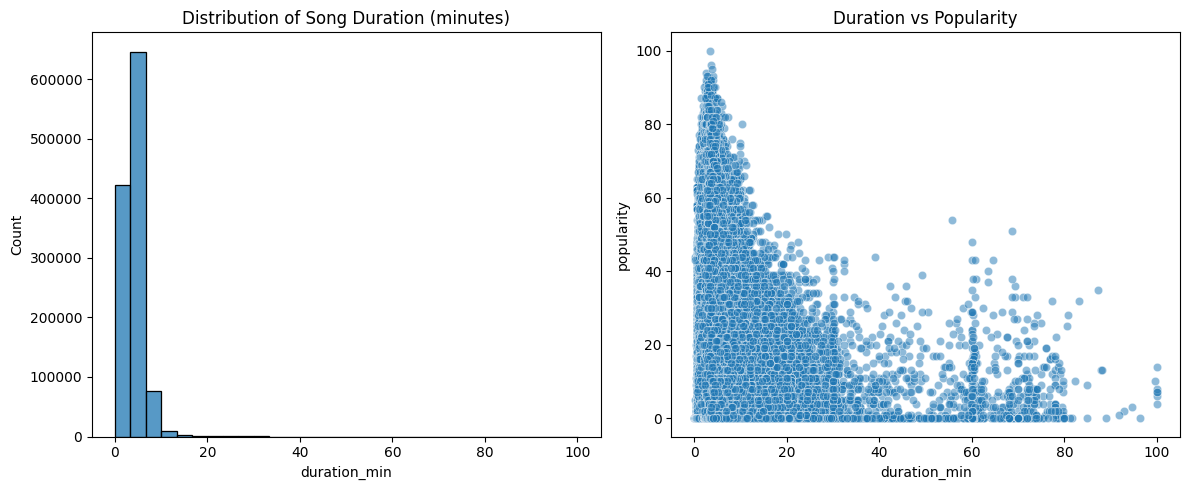

In [ ]:
plt.figure(figsize=(12, 5))

# Convert duration from ms to minutes
df['duration_min'] = df['duration_ms'] / 60000

# Duration distribution
plt.subplot(1, 2, 1)
sns.histplot(df['duration_min'], bins=30)
plt.title('Distribution of Song Duration (minutes)')

# Duration vs popularity
plt.subplot(1, 2, 2)
sns.scatterplot(x='duration_min', y='popularity', data=df, alpha=0.5)
plt.title('Duration vs Popularity')

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_min
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,...,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3,4.002767
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,...,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4,3.606450
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,...,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4,2.649333
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,...,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4,5.071550
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,...,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4,4.072000


In [ ]:
numerical_features = [
    'danceability', 'energy', 'key', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_min',
    'time_signature'
]

categorical_features = [
    'genre', 'year', 'mode'
]

In [ ]:
df['energy_danceability'] = df['energy'] * df['danceability']

# Mood Score (combination of valence and energy)
df['mood_score'] = (df['valence'] + df['energy']) / 2

# Duration buckets
df['duration_category'] = pd.cut(df['duration_min'],
                                bins=[0, 2, 4, 6, 10, 20],
                                labels=['very_short', 'short', 'medium', 'long', 'very_long'])

# Decade feature
df['decade'] = (df['year'] // 10) * 10

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features
features = numerical_features + [
    'energy_danceability', 'mood_score'
]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    ))
])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


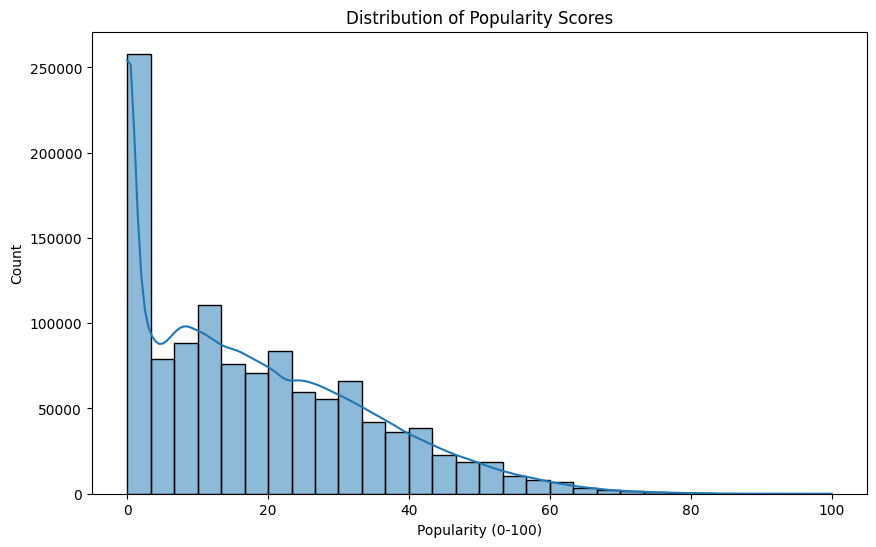

Popularity Score Statistics:
count    1.159748e+06
mean     1.838309e+01
std      1.588563e+01
min      0.000000e+00
25%      5.000000e+00
50%      1.500000e+01
75%      2.900000e+01
max      1.000000e+02
Name: popularity, dtype: float64


In [ ]:
# Check distribution of target variable (popularity)
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity (0-100)')
plt.ylabel('Count')
plt.show()

# Check balance statistics
print("Popularity Score Statistics:")
print(df['popularity'].describe())

# Check class balance (if converting to classification)
# For regression, we'll check if the distribution is skewed

## Class Balancing

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


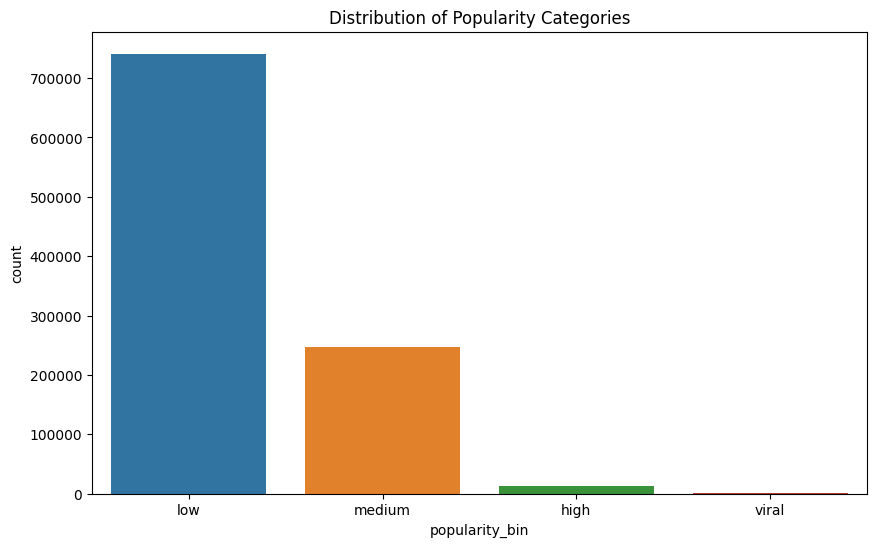

popularity_bin
low       74.025547
medium    24.586936
high       1.350967
viral      0.036550
Name: proportion, dtype: float64


In [ ]:
# Convert popularity to categorical bins for balance check
df['popularity_bin'] = pd.cut(df['popularity'], bins=[0, 30, 60, 80, 100],
                             labels=['low', 'medium', 'high', 'viral'])

# Plot distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='popularity_bin')
plt.title('Distribution of Popularity Categories')
plt.show()

# Print percentages
print(df['popularity_bin'].value_counts(normalize=True) * 100)

## Null Handeling

In [ ]:
# 1. First check where NaN values exist
print("NaN values per column:")
print(df.isna().sum())

# 2. Drop rows with NaN values in the columns we're using
df_clean = df.dropna(subset=['popularity', 'popularity_bin'] +
                   [col for col in df.columns if col not in ['popularity', 'popularity_bin']])

# 3. Verify no NaN values remain
print("\nAfter cleaning - NaN values:")
print(df_clean.isna().sum())

# 4. Now perform the stratified split
X_train, X_test, y_train, y_test = train_test_split(
    df_clean.drop(['popularity', 'popularity_bin'], axis=1),
    df_clean['popularity_bin'],  # Use binned version for stratification
    test_size=0.2,
    random_state=42,
    stratify=df_clean['popularity_bin']
)

print("\nSplit successful!")

NaN values per column:
Unnamed: 0                  0
artist_name                 0
track_name                  0
track_id                    0
popularity                  0
year                        0
genre                       0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
time_signature              0
duration_min                0
energy_danceability         0
mood_score                  0
duration_category        2637
decade                      0
popularity_bin         158391
dtype: int64

After cleaning - NaN values:
Unnamed: 0             0
artist_name            0
track_name             0
track_id               0
popularity             0
year                   0
genr

In [ ]:
# Separate classes
df_low = df[df['popularity_bin'] == 'low']
df_viral = df[df['popularity_bin'] == 'viral']

# Downsample majority class
df_low_down = resample(df_low,
                      replace=False,
                      n_samples=len(df_viral)*10,  # 10:1 ratio
                      random_state=42)

# Combine with minority class
df_balanced = pd.concat([df_low_down, df_viral])

# Now split this balanced dataset
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.drop(['popularity', 'popularity_bin'], axis=1),
    df_balanced['popularity_bin'],
    test_size=0.2,
    random_state=42,
    stratify=df_balanced['popularity_bin']
)

In [ ]:
print("Class distribution in balanced dataset:")
print(df_balanced['popularity_bin'].value_counts(normalize=True))

Class distribution in balanced dataset:
popularity_bin
low       0.909091
viral     0.090909
medium    0.000000
high      0.000000
Name: proportion, dtype: float64


In [ ]:
# Identify feature types
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get the input shape for ANN
input_shape = X_train_preprocessed.shape[1]
print(f"Input shape for ANN: {input_shape}")

Input shape for ANN: 9238


In [ ]:
# Convert labels to categorical (one-hot encoded)
num_classes = len(df_balanced['popularity_bin'].unique())
y_train_cat = to_categorical(pd.factorize(y_train)[0], num_classes=num_classes)
y_test_cat = to_categorical(pd.factorize(y_test)[0], num_classes=num_classes)

# Build ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

2025-05-15 08:48:12.540370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747298893.061421      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747298893.194594      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747298913.223792      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/d

## Model Training

In [ ]:
# Calculate class weights
# Use unique values from y_train directly
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_preprocessed, y_train_cat,
    validation_data=(X_test_preprocessed, y_test_cat),
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


I0000 00:00:1747298919.448097     104 service.cc:148] XLA service 0x7db35c00bd60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747298919.449413     104 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747298919.449433     104 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747298919.941749     104 cuda_dnn.cc:529] Loaded cuDNN version 90300


 57/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5554 - loss: 0.7871 - precision: 0.5554 - recall: 0.5554

I0000 00:00:1747298922.522137     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.5822 - loss: 0.7045 - precision: 0.5822 - recall: 0.5822 - val_accuracy: 0.9094 - val_loss: 0.4354 - val_precision: 0.9094 - val_recall: 0.9094
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8420 - loss: 0.2772 - precision: 0.8420 - recall: 0.8420 - val_accuracy: 0.9094 - val_loss: 0.2563 - val_precision: 0.9094 - val_recall: 0.9094
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9372 - loss: 0.1487 - precision: 0.9372 - recall: 0.9372 - val_accuracy: 0.9194 - val_loss: 0.1705 - val_precision: 0.9194 - val_recall: 0.9194
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9637 - loss: 0.0977 - precision: 0.9637 - recall: 0.9637 - val_accuracy: 0.9864 - val_loss: 0.0862 - val_precision: 0.9864 - val_recall: 0.9864
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9757 - loss: 0.0687 - precision: 0.9757 - recall: 0.9757 - val_accuracy: 0.9764 - val_loss: 0.0701 

## CLassification Report

In [ ]:
# Evaluate on test set
loss, accuracy, precision, recall = model.evaluate(X_test_preprocessed, y_test_cat)
print(f"\nTest Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")

# Classification report
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_preprocessed)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=df_balanced['popularity_bin'].unique()))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9808 - loss: 0.0554 - precision: 0.9808 - recall: 0.9808

Test Accuracy: 0.98
Test Precision: 0.98
Test Recall: 0.98
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step

Classification Report:
              precision    recall  f1-score   support

         low       0.99      0.99      0.99       733
       viral       0.90      0.89      0.90        73

    accuracy                           0.98       806
   macro avg       0.95      0.94      0.94       806
weighted avg       0.98      0.98      0.98       806



## Model Result plots

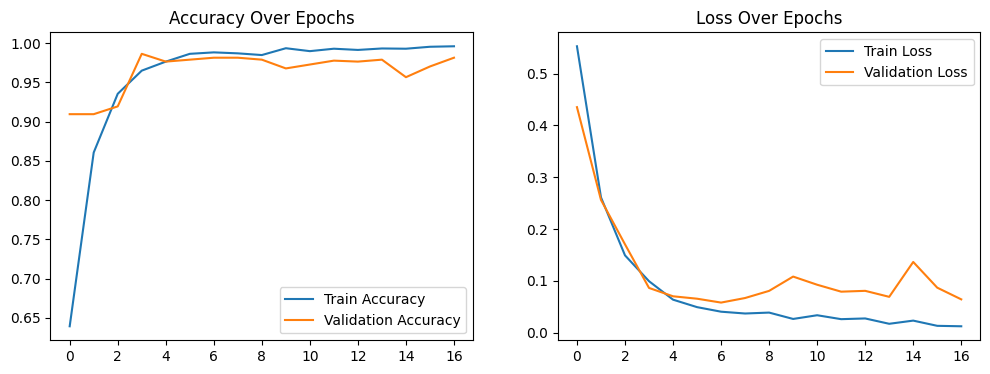

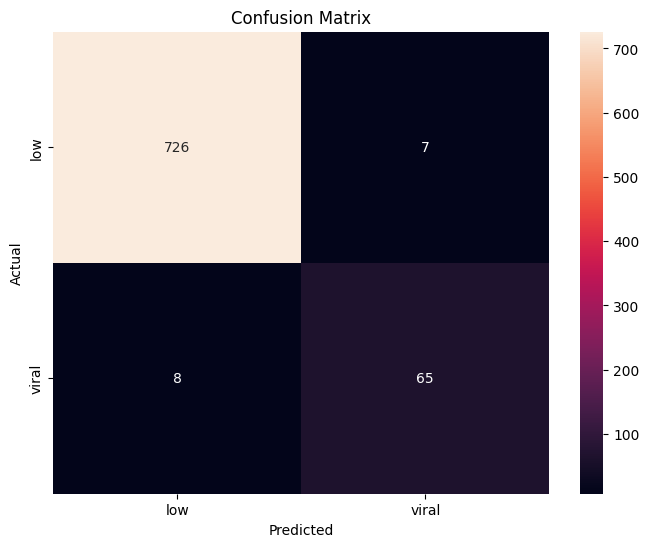

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=df_balanced['popularity_bin'].unique(),
            yticklabels=df_balanced['popularity_bin'].unique())
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## XAI Technoques

In [ ]:
pip install shap lime

Note: you may need to restart the kernel to use updated packages.


## SHAP

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
8725/8725 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
8725/8725 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
8732/8732 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
8738/8738 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
8732/8732 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
8732/8732 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
8732/8732 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
8725/8725 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
8725/8725 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
8725/8725 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
8732/8732 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
8732/8732 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step
1/1 ━━━━━━━━━━

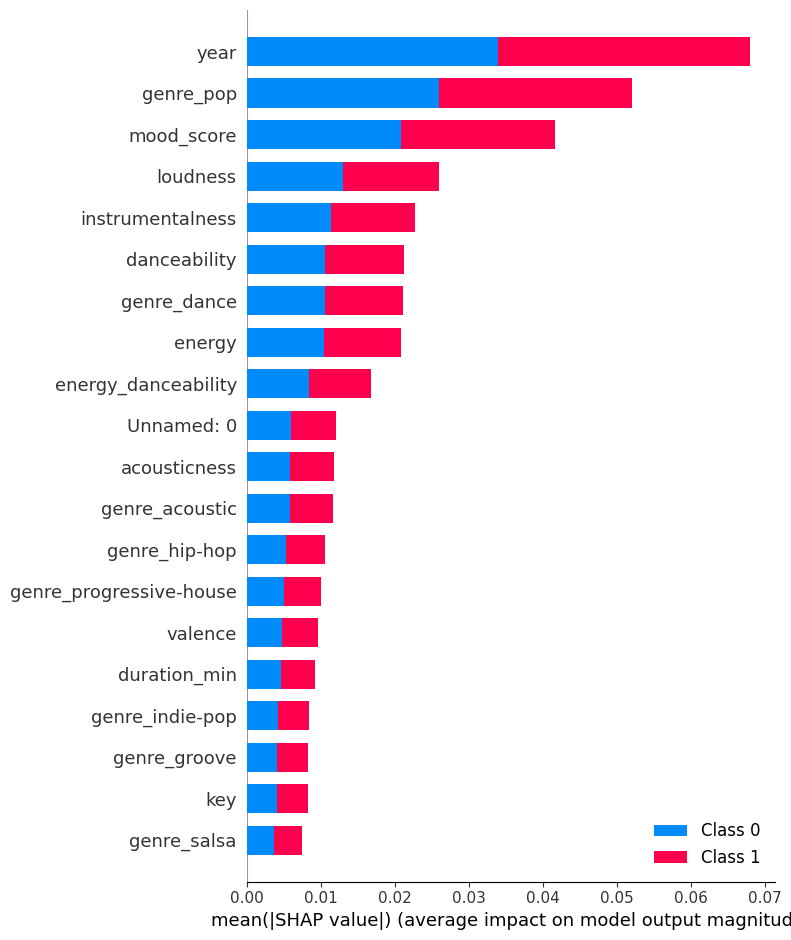


Individual Prediction Explanations

Sample 1 - True class: low


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

In [ ]:
import shap
import numpy as np

# 1. Create a SHAP explainer
explainer = shap.KernelExplainer(
    model.predict,
    shap.sample(X_train_preprocessed, 100)  # Use background sample
)

# 2. Calculate SHAP values for test set (sample for efficiency)
sample_idx = np.random.choice(X_test_preprocessed.shape[0], 50, replace=False)
shap_values = explainer.shap_values(X_test_preprocessed[sample_idx])

# 3. Get feature names after preprocessing
# For numerical features
num_feature_names = numeric_features.tolist()

# For categorical features (after one-hot encoding)
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features).tolist()

all_feature_names = num_feature_names + cat_feature_names

# 4. Visualizations
print("Global Feature Importance (mean absolute SHAP values)")
shap.summary_plot(shap_values, X_test_preprocessed[sample_idx], feature_names=all_feature_names)

# Explain individual predictions
print("\nIndividual Prediction Explanations")
for i in range(3):  # Show first 3 examples
    print(f"\nSample {i+1} - True class: {y_test.iloc[sample_idx[i]]}")
    shap.force_plot(
        explainer.expected_value,
        shap_values[i],
        X_test_preprocessed[sample_idx[i]],
        feature_names=all_feature_names
    )

## LIME

In [ ]:
from lime import lime_tabular
from lime.lime_tabular import LimeTabularExplainer

# 1. Create LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, 'toarray') else X_train_preprocessed,
    feature_names=all_feature_names,
    class_names=df_balanced['popularity_bin'].unique(),
    mode='classification',
    discretize_continuous=True
)

# 2. Explain individual predictions
sample_idx = 0  # First test sample
exp = explainer.explain_instance(
    X_test_preprocessed[sample_idx].toarray().flatten() if hasattr(X_test_preprocessed, 'toarray')
    else X_test_preprocessed[sample_idx],
    model.predict,
    num_features=10,
    top_labels=1
)

# 3. Visualization
print(f"True class: {y_test.iloc[sample_idx]}")
exp.show_in_notebook(show_table=True)

# Save explanation to file
exp.save_to_file('lime_explanation.html')

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
True class: low


## Save bert model result

In [ ]:
import joblib
from tensorflow.keras.models import save_model

# Save the preprocessing pipeline
joblib.dump(preprocessor, '/kaggle/working/song_preprocessor.pkl')

# Save the Keras model
save_model(model, '/kaggle/working/viral_song_model.h5')

# Save class names
import json
with open('class_names.json', 'w') as f:
    json.dump({
        'classes': df_balanced['popularity_bin'].unique().tolist(),
        'feature_names': all_feature_names
    }, f)

In [ ]:
def predict_virality(input_data):
    """
    Process raw input and make prediction
    input_data: Dictionary of feature values
    Returns: Dictionary of class probabilities
    """
    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data])

    # Preprocess
    processed = preprocessor.transform(input_df)

    # Predict
    probabilities = model.predict(processed)[0]

    # Format output
    return {class_name: float(prob)
            for class_name, prob in zip(df_balanced['popularity_bin'].unique(), probabilities)}

## Gradio Inferancing


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 32.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 92.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import joblib
import pandas as pd
import numpy as np
import gradio as gr
from tensorflow.keras.models import load_model
import json
import socket
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load model assets
try:
    # Load the preprocessor and model
    preprocessor = joblib.load('/kaggle/working/song_preprocessor.pkl')
    model = load_model('/kaggle/working/viral_song_model.h5')
    with open('class_names.json') as f:
        class_info = json.load(f)
        classes = class_info['classes']
except Exception as e:
    print(f"Error loading model assets: {e}")
    raise

def predict_virality(danceability, energy, key, loudness, speechiness,
                    acousticness, instrumentalness, liveness, valence,
                    tempo, time_signature, genre, year, mode):
    """
    Process input features and make prediction
    """
    # Create input dictionary with only the features we're collecting
    input_dict = {
        'danceability': danceability,
        'energy': energy,
        'key': key,
        'loudness': loudness,
        'speechiness': speechiness,
        'acousticness': acousticness,
        'instrumentalness': instrumentalness,
        'liveness': liveness,
        'valence': valence,
        'tempo': tempo,
        'time_signature': time_signature,
        'genre': genre,
        'year': year,
        'mode': mode
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_dict])

    # Add derived features that were in training
    input_df['energy_danceability'] = input_df['energy'] * input_df['danceability']
    input_df['mood_score'] = (input_df['valence'] + input_df['energy']) / 2

    # Add dummy columns that were in original training data but aren't used
    # This ensures the preprocessor gets all expected columns
    dummy_cols = {
        'artist_name': 'unknown',
        'track_name': 'unknown',
        'Unnamed: 0': 0,
        'track_id': 'unknown',
        'duration_ms': 180000,  # 3 minutes
        'duration_min': 3.0
    }

    for col, val in dummy_cols.items():
        input_df[col] = val

    try:
        # Preprocess - the preprocessor will ignore these dummy columns
        processed = preprocessor.transform(input_df)

        # Predict
        probabilities = model.predict(processed)[0]

        # Return as dictionary
        return {class_name: float(prob) for class_name, prob in zip(classes, probabilities)}

    except Exception as e:
        print(f"Prediction error: {e}")
        return {"error": "Prediction failed - please check input values"}

# Define input components
inputs = [
    gr.Slider(0, 1, label="Danceability", value=0.5),
    gr.Slider(0, 1, label="Energy", value=0.5),
    gr.Slider(0, 11, step=1, label="Key", value=5),
    gr.Slider(-60, 0, label="Loudness (dB)", value=-10),
    gr.Slider(0, 1, label="Speechiness", value=0.05),
    gr.Slider(0, 1, label="Acousticness", value=0.5),
    gr.Slider(0, 1, label="Instrumentalness", value=0.0),
    gr.Slider(0, 1, label="Liveness", value=0.1),
    gr.Slider(0, 1, label="Valence", value=0.5),
    gr.Slider(50, 200, label="Tempo (BPM)", value=120),
    gr.Dropdown([3, 4, 5], label="Time Signature", value=4),
    gr.Dropdown(["pop", "rock", "electronic", "hiphop", "classical"], label="Genre", value="pop"),
    gr.Slider(1900, 2025, step=1, label="Year", value=2023),
    gr.Dropdown([0, 1], label="Mode (0=Minor, 1=Major)", value=1)
]

# Create interface
interface = gr.Interface(
    fn=predict_virality,
    inputs=inputs,
    outputs=gr.Label(label="Virality Probability"),
    title="🎵 Song Virality Predictor",
    description="Predict how viral your song will be based on its audio features",
    flagging_mode="never",
    examples=[
        [0.75, 0.8, 4, -5.0, 0.05, 0.2, 0.0, 0.1, 0.9, 120, 4, "pop", 2023, 1],
        [0.3, 0.4, 7, -15.0, 0.2, 0.8, 0.5, 0.3, 0.3, 90, 4, "classical", 2010, 0]
    ]
)

def find_available_port(start_port=7860, end_port=7870):
    """Find an available port within the specified range"""
    import socket
    for port in range(start_port, end_port + 1):
        try:
            with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
                s.bind(('', port))
                return port
        except OSError:
            continue
    raise OSError(f"No available ports between {start_port}-{end_port}")

if __name__ == "__main__":
    try:
        port = find_available_port()
        print(f"Launching on port {port}")
        interface.launch(server_name="0.0.0.0", server_port=port)
    except Exception as e:
        print(f"Failed to launch: {e}")
        # Fallback to default port selection
        interface.launch()

Launching on port 7860
* Running on local URL:  http://0.0.0.0:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://9ef3750c06d02877a2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
